In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [14]:
df = pd.read_csv('D6_Heart_Dataset_2.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


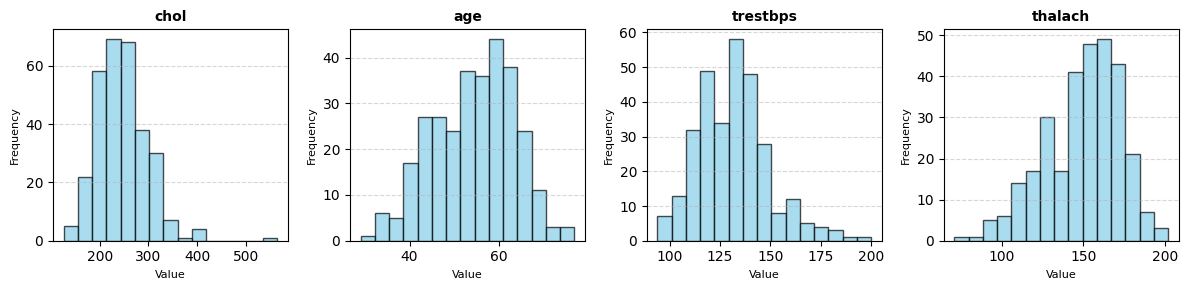

In [15]:
columns = ['chol', 'age', 'trestbps', 'thalach']  

fig, axes = plt.subplots(1, 4, figsize=(12, 3))  
for ax, col in zip(axes, columns):
    ax.hist(df[col], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_xlabel("Value", fontsize=8)
    ax.set_ylabel("Frequency", fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()  
plt.show()


In [16]:
## remove choestrol outliers 
df = df[df['chol'] < 500]

In [17]:
X = df.drop('target', axis =1)
y = df.target

In [18]:
## normalizing X 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression().fit(x_train, y_train)

In [24]:
y_pred = lr.predict(x_test)

The accuracy is: 80.32786885245902
Precision: 0.8333333333333334
Recall: 0.78125
F1 Score: 0.8064516129032258
Confusion Matrix:
 [[24  5]
 [ 7 25]]


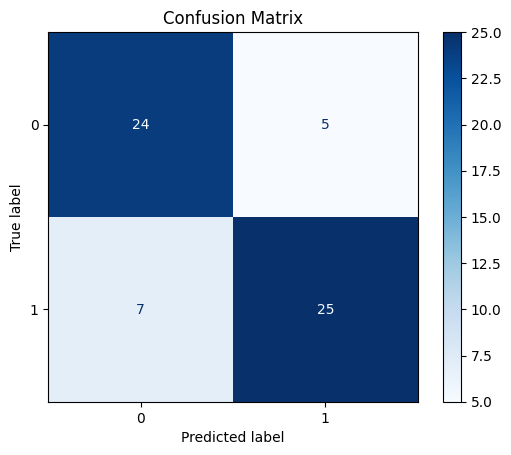

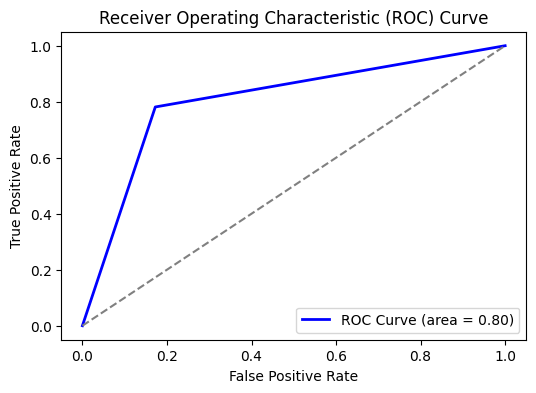

AUC Score: 0.8044181034482758


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Print Accuracy
print("The accuracy is:", metrics.accuracy_score(y_test, y_pred) * 100)

# Precision, Recall, and F1-score
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
metrics.ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)


### spambase

In [27]:
df2 = pd.read_csv('df_spam.csv')
df2.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham
0,0.0,1.0,0.000000,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000726,0.000400,0.000505,1.0
1,0.0,0.0,0.196078,0.0,0.050,0.0,0.0,0.000000,0.0,0.027503,...,0.0,0.036608,0.0,0.027465,0.000000,0.0,0.000908,0.001802,0.010795,0.0
2,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.116112,0.0,0.023652,...,0.0,0.012715,0.0,0.009545,0.010328,0.0,0.000433,0.000701,0.004040,0.0
3,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.013671,0.000000,0.0,0.001634,0.000601,0.001705,1.0
4,0.0,0.0,0.000000,0.0,0.117,0.0,0.0,0.000000,0.0,0.064356,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000500,0.000901,0.002778,1.0


In [29]:
X = df2.drop('ham', axis=1)
y = df2.ham

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [33]:
lr = LogisticRegression().fit(x_train, y_train)

In [34]:
y_pred = lr.predict(x_test)

The accuracy is: 88.17934782608695
Precision: 0.8834355828220859
Recall: 0.935064935064935
F1 Score: 0.9085173501577287
Confusion Matrix:
 [[217  57]
 [ 30 432]]


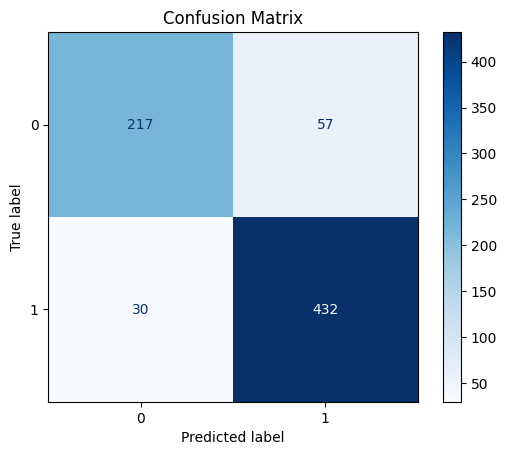

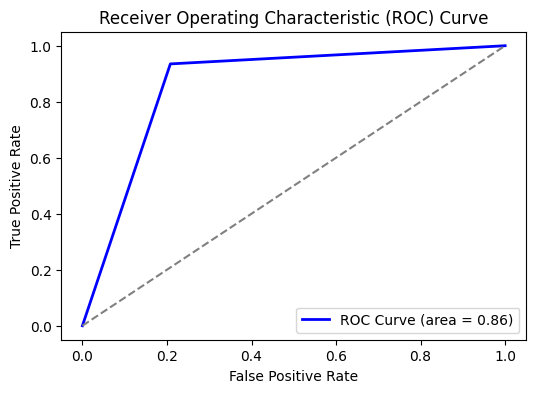

AUC Score: 0.8635178689923214


In [35]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Print Accuracy
print("The accuracy is:", metrics.accuracy_score(y_test, y_pred) * 100)

# Precision, Recall, and F1-score
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
metrics.ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

### compare with knn and naive bayes

In [41]:
## heart data 
X = df.drop('target', axis =1)
y = df.target

X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [42]:
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

In [43]:
nb = GaussianNB().fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Evaluate KNN
print("🔹 KNN Model Performance 🔹")
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("KNN Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("KNN F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print('-' * 50)

# Evaluate Naïve Bayes
print("🔹 Naïve Bayes Model Performance 🔹")
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naïve Bayes Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Naïve Bayes Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("Naïve Bayes F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Naïve Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


🔹 KNN Model Performance 🔹
KNN Accuracy: 0.8032786885245902
KNN Precision: 0.8172221221401549
KNN Recall: 0.8032786885245902
KNN F1 Score: 0.8023247597512719
KNN Confusion Matrix:
 [[26  3]
 [ 9 23]]
--------------------------------------------------
🔹 Naïve Bayes Model Performance 🔹
Naïve Bayes Accuracy: 0.819672131147541
Naïve Bayes Precision: 0.8298510661095038
Naïve Bayes Recall: 0.819672131147541
Naïve Bayes F1 Score: 0.8191869875670932
Naïve Bayes Confusion Matrix:
 [[26  3]
 [ 8 24]]


In [36]:
## spambase
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Evaluate KNN
print("🔹 KNN Model Performance 🔹")
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("KNN Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("KNN F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print('-' * 50)

# Evaluate Naïve Bayes
print("🔹 Naïve Bayes Model Performance 🔹")
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naïve Bayes Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Naïve Bayes Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("Naïve Bayes F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Naïve Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


🔹 KNN Model Performance 🔹
KNN Accuracy: 0.8804347826086957
KNN Precision: 0.8808356770061453
KNN Recall: 0.8804347826086957
KNN F1 Score: 0.8806080655324512
KNN Confusion Matrix:
 [[232  42]
 [ 46 416]]
--------------------------------------------------
🔹 Naïve Bayes Model Performance 🔹
Naïve Bayes Accuracy: 0.8016304347826086
Naïve Bayes Precision: 0.8490928917067333
Naïve Bayes Recall: 0.8016304347826086
Naïve Bayes F1 Score: 0.8046828655173676
Naïve Bayes Confusion Matrix:
 [[260  14]
 [132 330]]
